In [4]:
%matplotlib inline

In [5]:
from pylab import *
from numpy.linalg import eig, solve

In [6]:
def plot_pt(q, label, color='b'):
    plot([q[0]], [q[1]], 'o', color=color, label=label)

In [176]:
def solve_Rp(A,ql,qr):
    """
    Solve the Riemann problem for a 2x2 matrix A and given left and right states.
    """
    
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    qm = ql + alpha[0]*R[:,0]
    
    print('alpha = ', alpha)
    print('qm = ', qm)
    
    figure(figsize=(6,5))
    plot_pt(ql,'ql','r')
    plot_pt(qr,'qr','g')
    plot_pt(qm,'qm','b')
    plot((ql[0],qm[0],qr[0]), (ql[1],qm[1],qr[1]), 'b')
    legend()
    grid(True)
    xlabel('first component of q')
    ylabel('second component of q')
    title('phase plane solution of Riemann problem')
    
    t1 = 1
    t2 = 2
    n = 10000
    x = linspace(-1,5,n)
    q1t1 = ones(n)
    q1t2 = ones(n)
    q2t1 = ones(n)
    q2t2 = ones(n)
    for index1 in range(len(x)):
        
        if x[index1]<t1*evals[0]:
            q1t1[index1] = ql[0]
            q2t1[index1] = ql[1]    
        elif x[index1]>t1*evals[1]:
            q1t1[index1] = qr[0]
            q2t1[index1] = qr[1]
        else:
            q1t1[index1] = qm[0]
            q2t1[index1] = qm[1]
        
        if x[index1]<t2*evals[0]:
            q1t2[index1] = ql[0]
            q2t2[index1] = ql[1]
        elif x[index1]>t2*evals[1]:
            q1t2[index1] = qr[0]
            q2t2[index1] = qr[1]
        else:
            q1t2[index1] = qm[0]
            q2t2[index1] = qm[1]
        
    figure(figsize=(6,5))
    plot(x,q1t1, color="orange", label='q1')
    plot(x,q2t1, 'b', label='q2')
    legend()
    xlabel('x')
    ylabel('q value')
    title('Value of q at time t=1')
    figure(figsize=(6,5))
    plot(x,q1t2, color="orange",label='q1')
    plot(x,q2t2, 'b',label='q2')
    legend()
    xlabel('x')
    ylabel('q value')
    title('Value of q at time t=2')
    
    
    return qm

In [240]:
def xtplane(A,ql,qr):
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    qm1 = ql + alpha[0]*R[:,0]
    qm2 = qm1 + alpha[1]*R[:,1]
    
    print('alpha = ', alpha)
    print('ql* = ', qm1, 'and qr* =', qm2)
    
    
    x = linspace(0,10,10)
    figure(figsize=(6,5))
    plot(evals[0]*x,x,'y',label = '$x=\lambda^1t$')
    plot(evals[1]*x,x,'b',label = '$x=\lambda^2t$')
    plot(evals[2]*x,x,'r',label = '$x=\lambda^3t$')
    legend()
    matplotlib.pyplot.text(-5, 1, '$q_l$')
    matplotlib.pyplot.text(3, 1, '$q_r$')
    matplotlib.pyplot.text(0, 4, '$q^*_l$')
    matplotlib.pyplot.text(5, 4, '$q^*_r$')
    plot(linspace(min(evals[0]*10,-1),max(evals[2]*10,0),10),zeros(10),'k')
    plt.axis('off')
    return

Matrix A:
 [[1 1]
 [1 1]]
Eigenvalues of A: [0. 2.]
Matrix R of eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Condition number of R is 1
alpha =  [-0.70710678  0.70710678]
qm =  [ 1.5 -0.5]


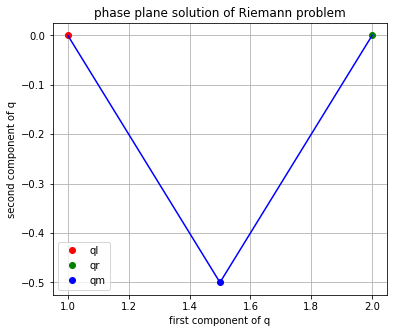

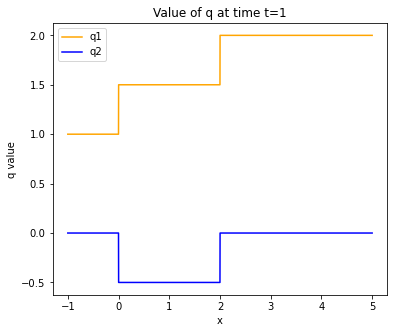

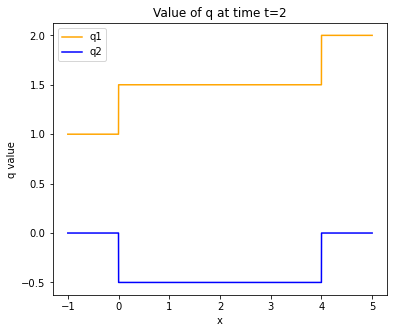

In [241]:
A = array([[1,1],[1,1]])
qleft = array([1,0])
qright = array([2,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[2 0]
 [0 2]]
Eigenvalues of A: [2. 2.]
Matrix R of eigenvectors:
 [[1. 0.]
 [0. 1.]]
Condition number of R is 1
alpha =  [ 1. -1.]
qm =  [1. 1.]


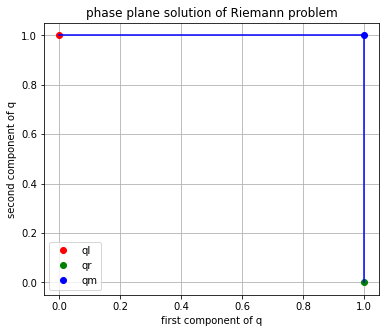

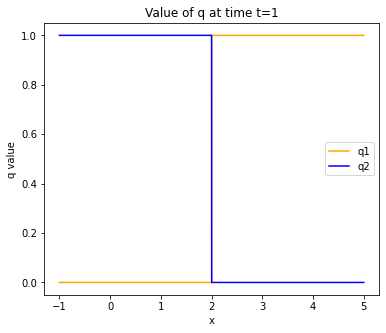

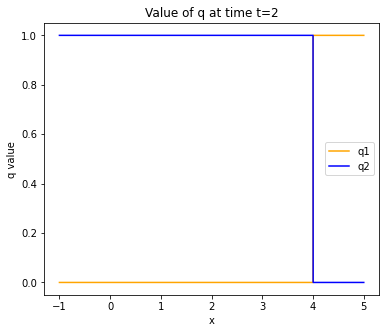

In [228]:
A = array([[2,0],[0,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[2.e+00 1.e+00]
 [1.e-04 2.e+00]]
Eigenvalues of A: [1.99 2.01]
Matrix R of eigenvectors:
 [[-0.99995    0.99995  ]
 [ 0.0099995  0.0099995]]
Condition number of R is 100
alpha =  [-50.50252494 -49.50247494]
qm =  [50.5    0.495]


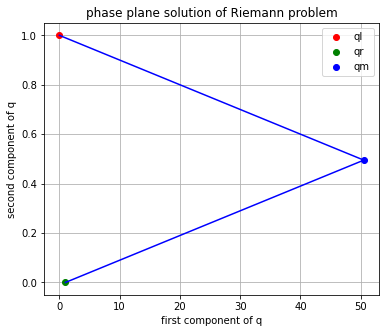

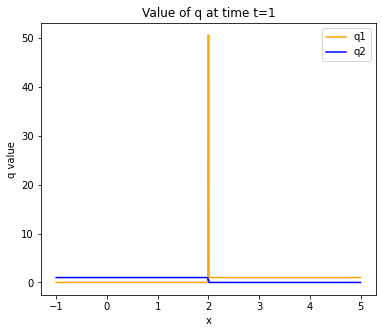

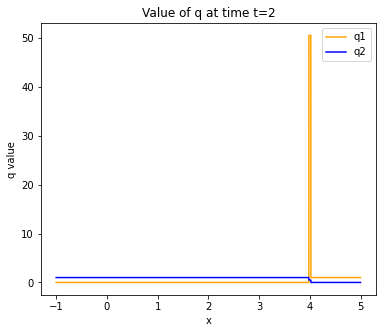

In [229]:
A = array([[2,1],[.0001,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[ 1.  -1.5]
 [-0.5  1. ]]
Eigenvalues of A: [0.1339746 1.8660254]
Matrix R of eigenvectors:
 [[ 0.8660254  0.8660254]
 [ 0.5       -0.5      ]]
Condition number of R is 1.73205
alpha =  [-0.42264973  1.57735027]
qm =  [-0.3660254   0.78867513]


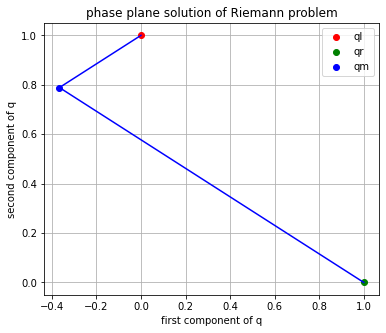

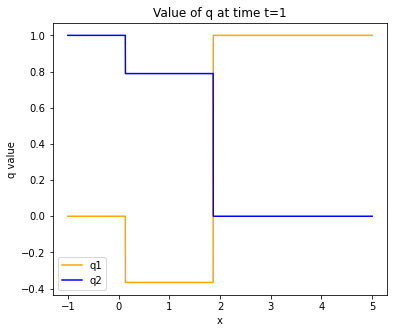

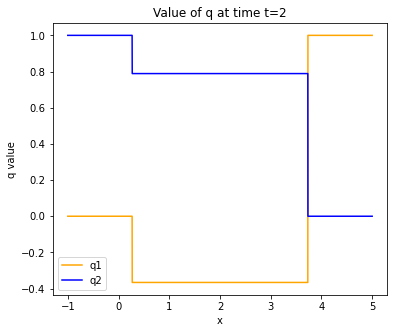

In [230]:
A = array([[1,-1.5],[-.5,1]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[0 0 4]
 [0 1 0]
 [1 0 0]]
Eigenvalues of A: [-2.  1.  2.]
Matrix R of eigenvectors:
 [[-0.89442719  0.          0.89442719]
 [ 0.          1.          0.        ]
 [ 0.4472136   0.          0.4472136 ]]
Condition number of R is 2
alpha =  [1.11803399 3.         1.11803399]
ql* =  [0.  2.  0.5] and qr* = [0.  5.  0.5]


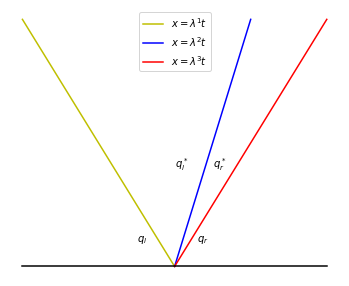

In [242]:
A = array([[0,0,4],[0,1,0],[1,0,0]])
qleft = array([1,2,0])
qright = array([1,5,1])
xtplane(A,qleft,qright)

Matrix A:
 [[1 0 2]
 [0 2 0]
 [0 0 3]]
Eigenvalues of A: [1. 2. 3.]
Matrix R of eigenvectors:
 [[1.         0.         0.70710678]
 [0.         1.         0.        ]
 [0.         0.         0.70710678]]
Condition number of R is 2.41421
alpha =  [0.         2.         2.82842712]
ql* =  [1. 1. 1.] and qr* = [1. 3. 1.]


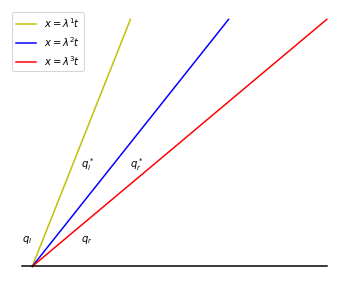

In [234]:
A = array([[1,0,2],[0,2,0],[0,0,3]])
qleft = array([1,1,1])
qright = array([3,3,3])
xtplane(A,qleft,qright)